### Perform Clustering(Hierarchical, Kmeans & DBSCAN) for the crime data and identify the number of clusters formed and draw inferences.

Data Description:
Murder -- Muder rates in different places of United States

Assualt- Assualt rate in different places of United States

UrbanPop - urban population in different places of United States

Rape - Rape rate in different places of United States

#### Project Background
Analysing the different crime rates in different areas of United States.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import warnings as warnings
warnings.filterwarnings("ignore")
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from scipy.cluster.hierarchy import linkage 
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
import sklearn
from sklearn.neighbors import NearestNeighbors  
from sklearn.cluster import DBSCAN

In [2]:
# Import Dataset
crime=pd.read_csv('crime_data.csv')
crime

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6
5,Colorado,7.9,204,78,38.7
6,Connecticut,3.3,110,77,11.1
7,Delaware,5.9,238,72,15.8
8,Florida,15.4,335,80,31.9
9,Georgia,17.4,211,60,25.8


Exploring the dataset

In [3]:
# Check the data types
crime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  50 non-null     object 
 1   Murder      50 non-null     float64
 2   Assault     50 non-null     int64  
 3   UrbanPop    50 non-null     int64  
 4   Rape        50 non-null     float64
dtypes: float64(2), int64(2), object(1)
memory usage: 2.1+ KB


In [4]:
# Summary of the data
crime.describe().T

,count,mean,std,min,25%,50%,75%,max
Murder,50.0,7.788,4.355510,0.8,4.075,7.25,11.250,17.4
Assault,50.0,170.760,83.337661,45.0,109.000,159.00,249.000,337.0
UrbanPop,50.0,65.540,14.474763,32.0,54.500,66.00,77.750,91.0
Rape,50.0,21.232,9.366385,7.3,15.075,20.10,26.175,46.0


###### Modifying the dataset

In [5]:
# Renaming the Unnamed: 0 Column into States
crime = crime.rename(columns={"Unnamed: 0":"States"})
crime.head(10)


,States,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6
5,Colorado,7.9,204,78,38.7
6,Connecticut,3.3,110,77,11.1
7,Delaware,5.9,238,72,15.8
8,Florida,15.4,335,80,31.9
9,Georgia,17.4,211,60,25.8


###### Handling missing values

In [6]:
# Check for Null values
crime.isnull().sum()

States      0
Murder      0
Assault     0
UrbanPop    0
Rape        0
dtype: int64

In [7]:
# Check for duplicate values
crime[crime.duplicated()].shape

(0, 5)

In [8]:
crime[crime.duplicated()]

,States,Murder,Assault,UrbanPop,Rape


##### There are no missing values and duplicates

### Exploring data using Visualisation

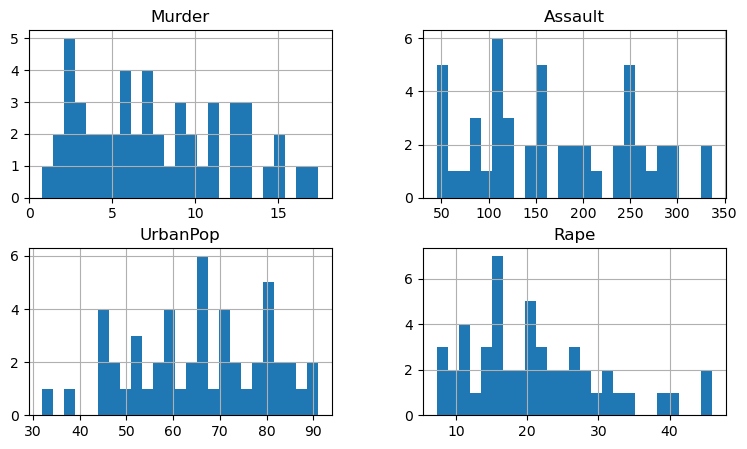

In [9]:
#Histogram
crime.hist(figsize=(9,5),bins=25)
plt.show()

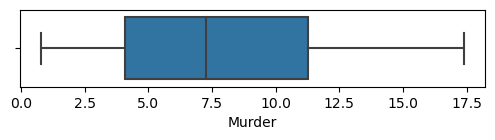

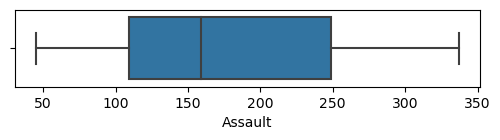

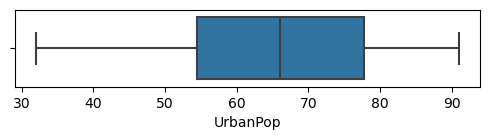

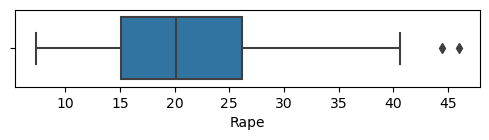

In [10]:
#Boxplot

for feature in crime.columns[1:]:
    plt.figure(figsize=(6,1))
    sb.boxplot(crime[feature])

### Observation
We can clearly see that Assault crime rate is high, followed by rape and murder crime rate.

#### Correlation and Heat map

In [11]:
# Checking for Correlation between variables
crime.corr()

,Murder,Assault,UrbanPop,Rape
Murder,1.000000,0.801873,0.069573,0.563579
Assault,0.801873,1.000000,0.258872,0.665241
UrbanPop,0.069573,0.258872,1.000000,0.411341
Rape,0.563579,0.665241,0.411341,1.000000


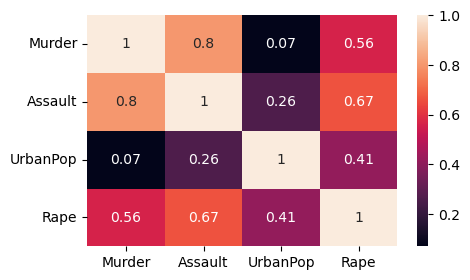

In [12]:
plt.figure(figsize=(5,3))
sb.heatmap(crime.corr(),annot=True)
plt.show()

### Observation

##### We can see that 'Urban' population is not much influencing the Assault and murder rate. But it may be a reason for Rape rate.
####But Murder rate and Rape rate are strongly correlated to Assault rate.

<Figure size 300x100 with 0 Axes>

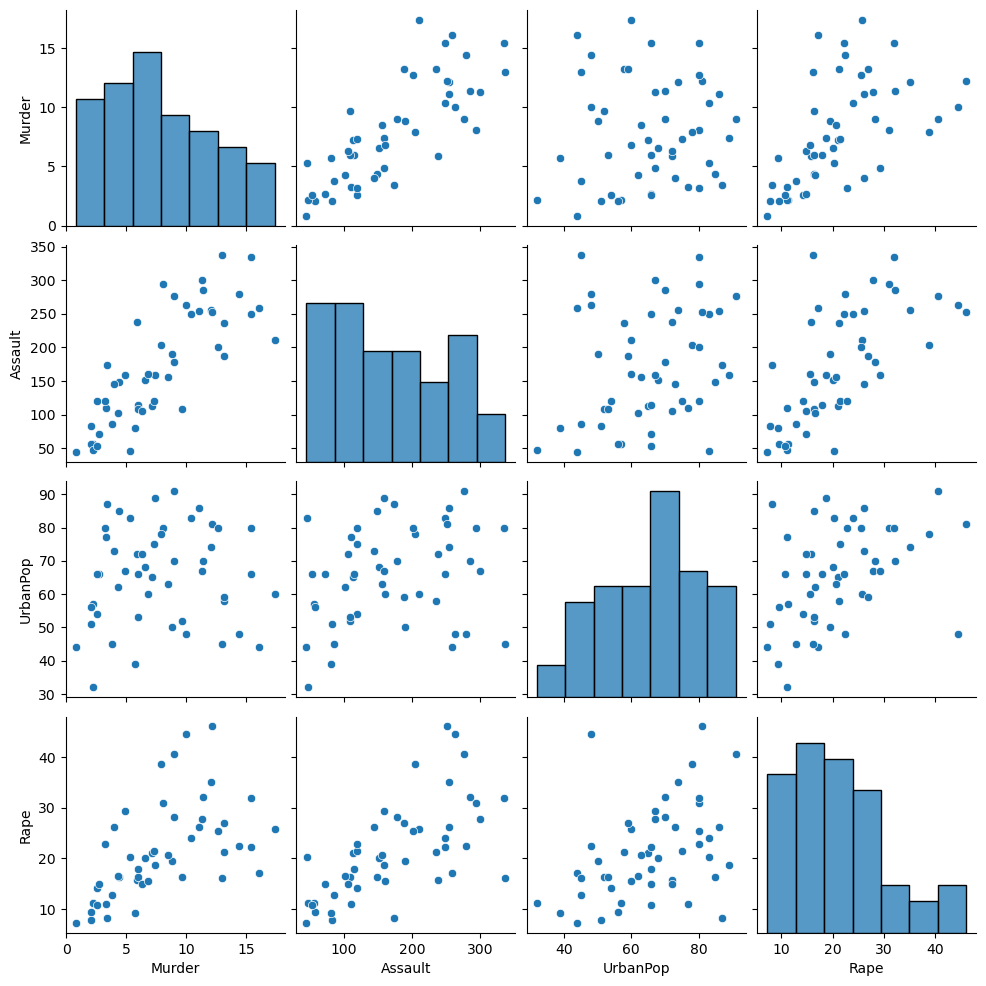

In [13]:
plt.figure(figsize=(3,1))
sb.pairplot(data=crime)

#### Visualizing features State wise

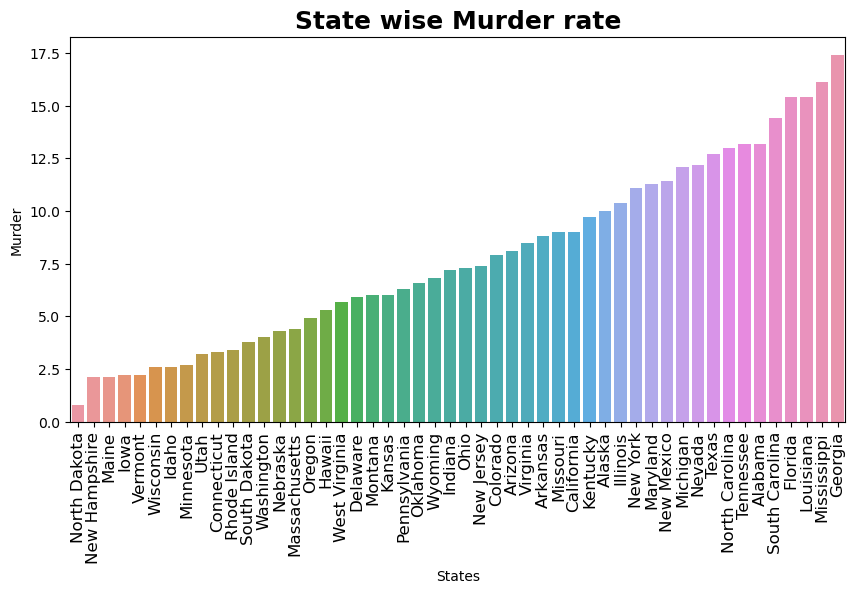

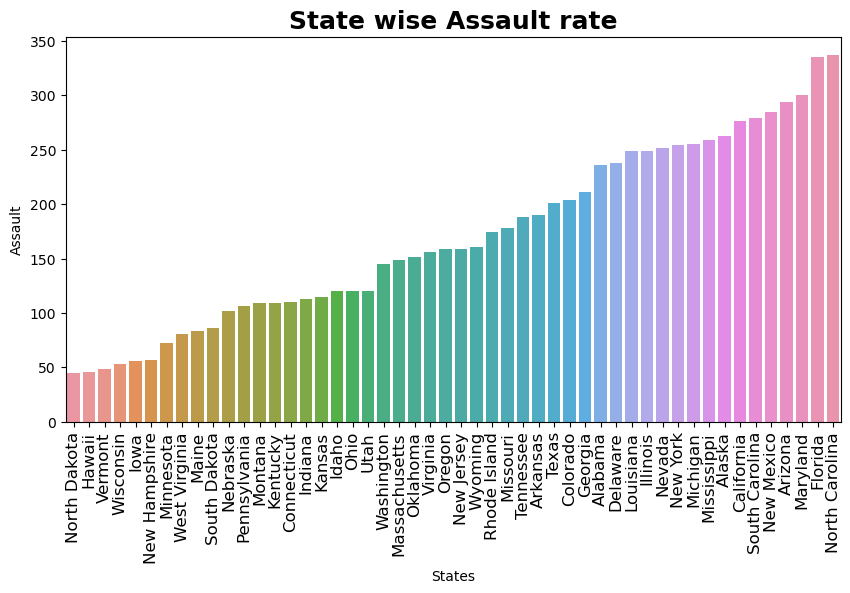

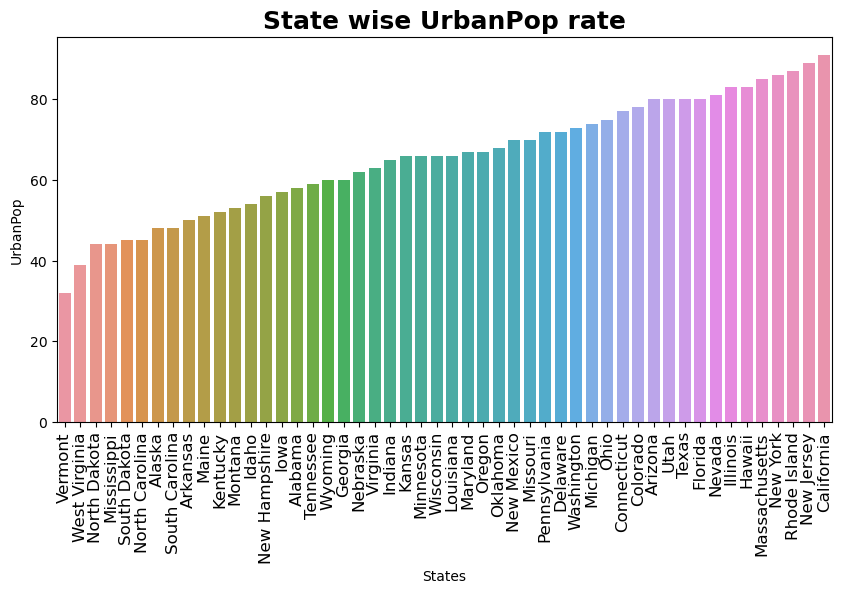

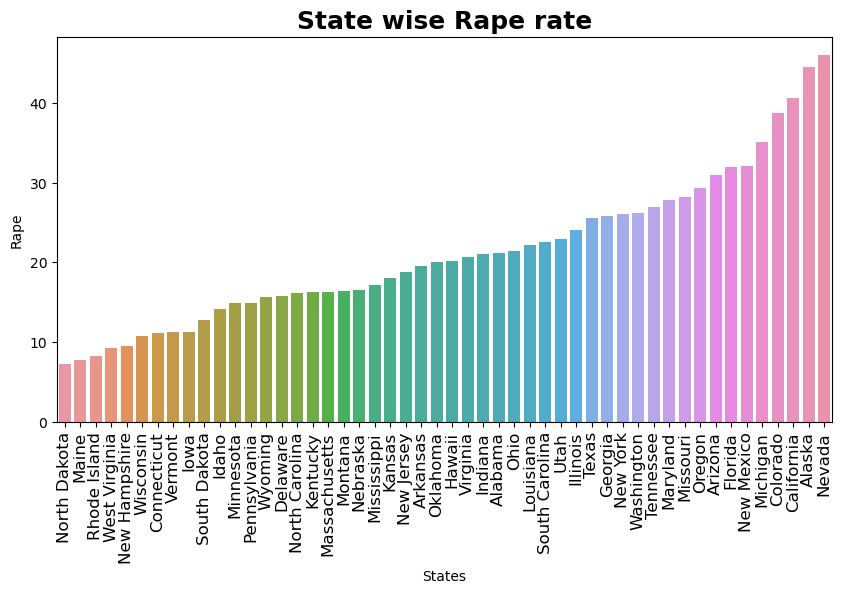

In [14]:
for i in crime.columns[1:]:
    plt.figure(figsize=(10,5))
    sb.barplot(x=crime["States"],y=i, data=crime, 
              order=crime.sort_values(i).States)
    plt.xticks(rotation = 90,fontsize = 12)
    plt.title("State wise "+str(i)+" rate", fontsize=18, fontweight='bold')
plt.show()

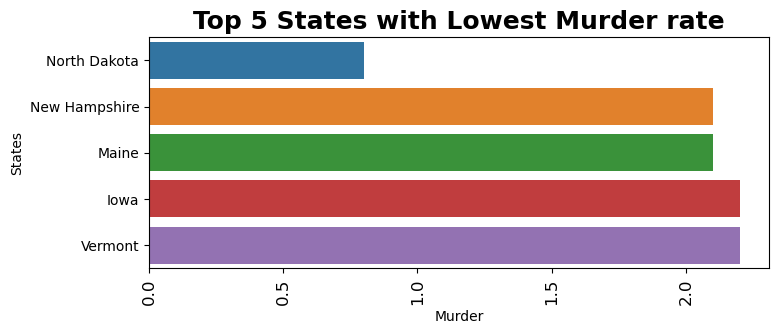

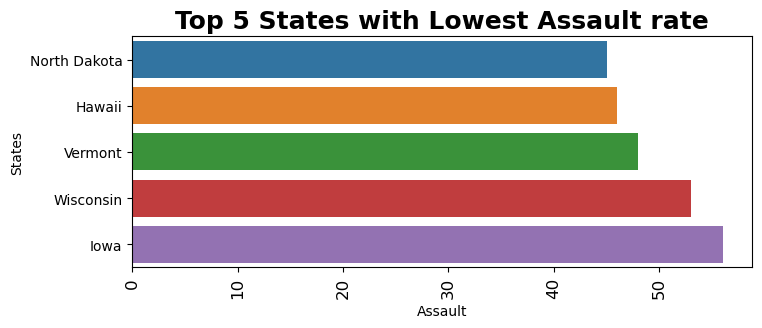

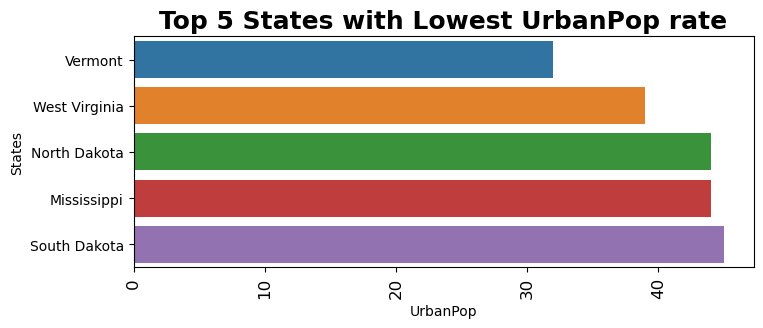

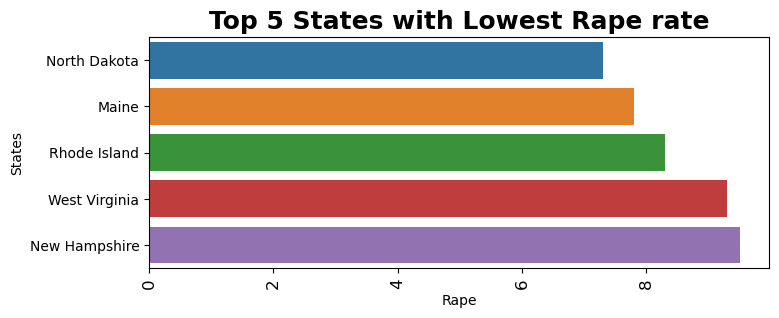

In [15]:
#finding top 5 state with Lowest crimes

for i in crime.columns[1:]:
    plt.figure(figsize=(8,3))
    sb.barplot(x=i,y=crime["States"], data=crime, 
              order=crime.sort_values(i,ascending=True).States[:5])
    plt.xticks(rotation = 90,fontsize = 12)
    plt.title("Top 5 States with Lowest "+str(i)+" rate", fontsize=18, fontweight='bold')
plt.show()

### Observation
We can clearly see that the North Dakota has the lowest crime rate and the urban population is also less.
Vermont with lowest urban population has the low murder rate and assault rate.
But in other countries, we don't see much resemblence.

### Pre-Processing the Data

In [16]:
#Standardising the data
#dropping states column

crime_data = crime.drop(['States'],axis=1)
crime_data.head()

,Murder,Assault,UrbanPop,Rape
0,13.2,236,58,21.2
1,10.0,263,48,44.5
2,8.1,294,80,31.0
3,8.8,190,50,19.5
4,9.0,276,91,40.6


In [17]:
standard_scaler = StandardScaler()
crime_data_std = standard_scaler.fit_transform(crime_data)
crime_data_std.shape

(50, 4)

In [18]:
crime_data_std

array([[ 1.25517927,  0.79078716, -0.52619514, -0.00345116],
       [ 0.51301858,  1.11805959, -1.22406668,  2.50942392],
       [ 0.07236067,  1.49381682,  1.00912225,  1.05346626],
       [ 0.23470832,  0.23321191, -1.08449238, -0.18679398],
       [ 0.28109336,  1.2756352 ,  1.77678094,  2.08881393],
       [ 0.02597562,  0.40290872,  0.86954794,  1.88390137],
       [-1.04088037, -0.73648418,  0.79976079, -1.09272319],
       [-0.43787481,  0.81502956,  0.45082502, -0.58583422],
       [ 1.76541475,  1.99078607,  1.00912225,  1.1505301 ],
       [ 2.22926518,  0.48775713, -0.38662083,  0.49265293],
       [-0.57702994, -1.51224105,  1.21848371, -0.11129987],
       [-1.20322802, -0.61527217, -0.80534376, -0.75839217],
       [ 0.60578867,  0.94836277,  1.21848371,  0.29852525],
       [-0.13637203, -0.70012057, -0.03768506, -0.0250209 ],
       [-1.29599811, -1.39102904, -0.5959823 , -1.07115345],
       [-0.41468229, -0.67587817,  0.03210209, -0.34856705],
       [ 0.44344101, -0.

### Normalising the data

In [19]:
min_max = MinMaxScaler()
crime_data_norm = min_max.fit_transform(crime_data)
crime_data_norm.shape

(50, 4)

In [20]:
crime_data_norm

array([[0.74698795, 0.65410959, 0.44067797, 0.35917313],
       [0.55421687, 0.74657534, 0.27118644, 0.96124031],
       [0.43975904, 0.85273973, 0.81355932, 0.6124031 ],
       [0.48192771, 0.49657534, 0.30508475, 0.31524548],
       [0.4939759 , 0.79109589, 1.        , 0.86046512],
       [0.42771084, 0.54452055, 0.77966102, 0.81136951],
       [0.15060241, 0.22260274, 0.76271186, 0.09819121],
       [0.30722892, 0.6609589 , 0.6779661 , 0.21963824],
       [0.87951807, 0.99315068, 0.81355932, 0.63565891],
       [1.        , 0.56849315, 0.47457627, 0.47803618],
       [0.27108434, 0.00342466, 0.86440678, 0.33333333],
       [0.10843373, 0.25684932, 0.37288136, 0.17829457],
       [0.57831325, 0.69863014, 0.86440678, 0.43152455],
       [0.38554217, 0.23287671, 0.55932203, 0.35400517],
       [0.08433735, 0.03767123, 0.42372881, 0.10335917],
       [0.31325301, 0.23972603, 0.57627119, 0.27648579],
       [0.53614458, 0.21917808, 0.33898305, 0.23255814],
       [0.87951807, 0.69863014,

However both give almost same result. So adopt Standardised data.

## Build Clustering model for Standardised data

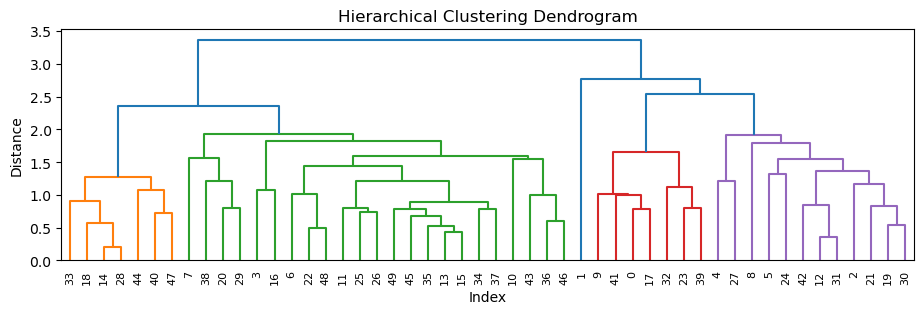

In [21]:
z = linkage(crime_data_std, method="average",metric="euclidean")
plt.figure(figsize=(11, 3))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Index')
plt.ylabel('Distance')
sch.dendrogram(z)
plt.show() 

###### Here we can see that there are 5 no . of clusters.

#### Buliding the Clustering model

Before selecting no. of clusters, check Silhouette score by varying number of clusters in the model build. Silhouette score gives the accuracy of a model.

In [22]:
for nc in range(2,6):
    h_cluster = AgglomerativeClustering(n_clusters=nc, linkage='average',affinity = "euclidean").fit(crime_data_std)
    cluster_labels=pd.Series(h_cluster.labels_)
    slht_scr= sklearn.metrics.silhouette_score(crime_data_std, cluster_labels)
    print("For n_clusters =", nc,"The average silhouette_score is :", slht_scr)

For n_clusters = 2 The average silhouette_score is : 0.4084890326217641
For n_clusters = 3 The average silhouette_score is : 0.34863679190476177
For n_clusters = 4 The average silhouette_score is : 0.3636819420151221
For n_clusters = 5 The average silhouette_score is : 0.3212682619092323


###### Model with 4 clusters has the highest accuracy. Hence build the model with 4  clusters.

In [23]:
h_cluster = AgglomerativeClustering(n_clusters=4, linkage='average',affinity = "euclidean").fit(crime_data_std) 
cluster_labels=pd.Series(h_cluster.labels_)
cluster_labels
crime['clust']=cluster_labels
crime 

,States,Murder,Assault,UrbanPop,Rape,clust
0,Alabama,13.2,236,58,21.2,3
1,Alaska,10.0,263,48,44.5,2
2,Arizona,8.1,294,80,31.0,1
3,Arkansas,8.8,190,50,19.5,0
4,California,9.0,276,91,40.6,1
5,Colorado,7.9,204,78,38.7,1
6,Connecticut,3.3,110,77,11.1,0
7,Delaware,5.9,238,72,15.8,0
8,Florida,15.4,335,80,31.9,1
9,Georgia,17.4,211,60,25.8,3


### Analysing the results obtained from the model

In [24]:
crime.iloc[:,1:].groupby(crime.clust).mean()

,Murder,Assault,UrbanPop,Rape,clust
clust,,,,,
0,4.870000,114.433333,63.633333,15.943333,0.0
1,10.883333,256.916667,78.333333,32.250000,1.0
2,10.000000,263.000000,48.000000,44.500000,2.0
3,14.671429,251.285714,54.285714,21.685714,3.0


### We can see that 4 no. of clusters are formed.

##### Following are the Different states in each cluster

In [25]:
h_cluster_0 = crime[(crime.clust==0)]
h_cluster_0

,States,Murder,Assault,UrbanPop,Rape,clust
3,Arkansas,8.8,190,50,19.5,0
6,Connecticut,3.3,110,77,11.1,0
7,Delaware,5.9,238,72,15.8,0
10,Hawaii,5.3,46,83,20.2,0
11,Idaho,2.6,120,54,14.2,0
13,Indiana,7.2,113,65,21.0,0
14,Iowa,2.2,56,57,11.3,0
15,Kansas,6.0,115,66,18.0,0
16,Kentucky,9.7,109,52,16.3,0
18,Maine,2.1,83,51,7.8,0


In [26]:
h_cluster_1 = crime[(crime.clust==1)]
h_cluster_1

,States,Murder,Assault,UrbanPop,Rape,clust
2,Arizona,8.1,294,80,31.0,1
4,California,9.0,276,91,40.6,1
5,Colorado,7.9,204,78,38.7,1
8,Florida,15.4,335,80,31.9,1
12,Illinois,10.4,249,83,24.0,1
19,Maryland,11.3,300,67,27.8,1
21,Michigan,12.1,255,74,35.1,1
24,Missouri,9.0,178,70,28.2,1
27,Nevada,12.2,252,81,46.0,1
30,New Mexico,11.4,285,70,32.1,1


In [27]:
h_cluster_2 = crime[(crime.clust==2)]
h_cluster_2

,States,Murder,Assault,UrbanPop,Rape,clust
1,Alaska,10.0,263,48,44.5,2


In [28]:
h_cluster_3 = crime[(crime.clust==3)]
h_cluster_3

,States,Murder,Assault,UrbanPop,Rape,clust
0,Alabama,13.2,236,58,21.2,3
9,Georgia,17.4,211,60,25.8,3
17,Louisiana,15.4,249,66,22.2,3
23,Mississippi,16.1,259,44,17.1,3
32,North Carolina,13.0,337,45,16.1,3
39,South Carolina,14.4,279,48,22.5,3
41,Tennessee,13.2,188,59,26.9,3


### Observation

#### We can observe that Cluster-2 contains only one observation, that is of state 'Alaska'.
##### 'Alaska' has low urban population rate, but it has high Rape rate when compared to state 'South Calorina' of Cluster-3 having same urban popualtion rate. That is the reason why it stood differently from all the clusters.

<Figure size 560x240 with 0 Axes>

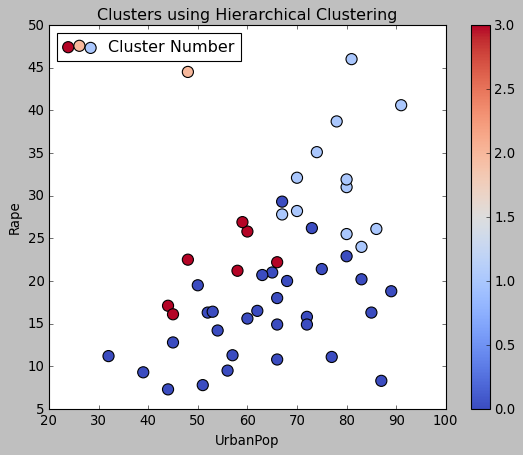

In [29]:
plt.style.use(['classic']) 
plt.figure(figsize=(7,3))
crime.plot(x="UrbanPop",y ="Rape",c=cluster_labels,label = 'Cluster Number',kind="scatter",s=100 ,cmap=plt.cm.coolwarm) 
plt.title('Clusters using Hierarchical Clustering') 
plt.show()

We can see that some of the observations of one cluster are overlapping with the other cluster. So let us check the accuracy of the model in classifying data by evaluating Silhouette score.

### Evaluating accuracy of the model using Silhouette score

In [30]:
# Silhouette score ranges from -1 to 1. '-1' indicates model is not good. '1' indicates model is best. 
# '0' indicates clusters are overlapping
slht_scr_hc = sklearn.metrics.silhouette_score(crime_data_std, cluster_labels)
slht_scr_hc

0.3636819420151221

The score is closer to '0'. It indicates that the model is not that accurate at classifying the data, as clusters are overlapping. So try other methods of clustering.

## Using K-means Clustering model

###### Step-4.2.1 : Determing no. of clusters using 'Elbow method'

In [31]:
#pip install threadpoolctl==3.1.0

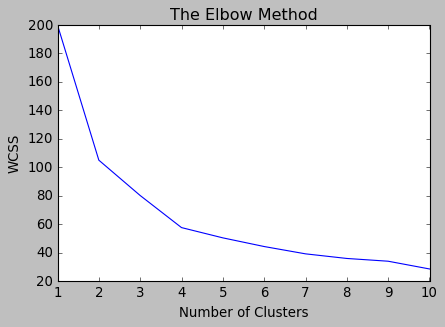

In [32]:
from sklearn.cluster import KMeans
fig = plt.figure(figsize=(6, 4))
WCSS = []
for i in range(1, 11):
    k_cluster = KMeans(n_clusters=i)
    k_cluster.fit(crime_data_std)
    WCSS.append(k_cluster.inertia_)
plt.plot(range(1, 11), WCSS)
plt.title('The Elbow Method')
plt.ylabel('WCSS')
plt.xlabel('Number of Clusters')

plt.show()  

### Therefore from the elbow curve, we can observe that the number of clusters are 5

#### Buliding the Clustering model
###Before selecting no. of clusters, check Silhouette score by varying number of clusters in the model build. Silhouette score gives the accuracy of a model.

In [33]:
# Silhouette score ranges from -1 to 1. '-1' indicates model is not good. '1' indicates model is best. 
# '0' indicates clusters are overlapping
for nc in range(2,6):
    k1_cluster = KMeans(n_clusters=nc, random_state=0)
    y1_kmeans = k1_cluster.fit_predict(crime_data_std)
    slht_scr= sklearn.metrics.silhouette_score(crime_data_std, y1_kmeans)
    print("For n_clusters =", nc,"The average silhouette_score is :", slht_scr)

For n_clusters = 2 The average silhouette_score is : 0.4084890326217641
For n_clusters = 3 The average silhouette_score is : 0.3095091512791688
For n_clusters = 4 The average silhouette_score is : 0.33968891433344395
For n_clusters = 5 The average silhouette_score is : 0.30612803169146263


###### Model with 4 clusters has the highest accuracy. Hence build the model with 4 clusters.¶

In [34]:
k_cluster = KMeans(n_clusters=4)
y_kmeans = k_cluster.fit_predict(crime_data_std)  

In [35]:
y_kmeans

array([3, 1, 1, 3, 1, 1, 2, 2, 1, 3, 2, 0, 1, 2, 0, 2, 0, 3, 0, 1, 2, 1,
       0, 3, 1, 0, 0, 1, 0, 2, 1, 1, 3, 0, 2, 2, 2, 2, 2, 3, 0, 3, 1, 2,
       0, 2, 2, 0, 0, 2])

In [36]:
k_cluster.labels_

array([3, 1, 1, 3, 1, 1, 2, 2, 1, 3, 2, 0, 1, 2, 0, 2, 0, 3, 0, 1, 2, 1,
       0, 3, 1, 0, 0, 1, 0, 2, 1, 1, 3, 0, 2, 2, 2, 2, 2, 3, 0, 3, 1, 2,
       0, 2, 2, 0, 0, 2])

In [37]:
k_cluster.cluster_centers_

array([[-0.97130281, -1.11783581, -0.93954982, -0.97657842],
       [ 0.70212683,  1.04999438,  0.72997363,  1.28990383],
       [-0.49440658, -0.3864845 ,  0.58167593, -0.26431024],
       [ 1.42622412,  0.88321132, -0.82279055,  0.01946669]])

In [38]:
# Within cluster sum of squares or variance
k_cluster.inertia_

57.55425863091104

In [39]:
ks = pd.Series(y_kmeans) 
crime['clust']=ks
crime

,States,Murder,Assault,UrbanPop,Rape,clust
0,Alabama,13.2,236,58,21.2,3
1,Alaska,10.0,263,48,44.5,1
2,Arizona,8.1,294,80,31.0,1
3,Arkansas,8.8,190,50,19.5,3
4,California,9.0,276,91,40.6,1
5,Colorado,7.9,204,78,38.7,1
6,Connecticut,3.3,110,77,11.1,2
7,Delaware,5.9,238,72,15.8,2
8,Florida,15.4,335,80,31.9,1
9,Georgia,17.4,211,60,25.8,3


#### Analysing the results obtained from the model

In [40]:
crime.iloc[:,1:].groupby(crime.clust).mean()

,Murder,Assault,UrbanPop,Rape,clust
clust,,,,,
0,3.600000,78.538462,52.076923,12.176923,0.0
1,10.815385,257.384615,76.000000,33.192308,1.0
2,5.656250,138.875000,73.875000,18.781250,2.0
3,13.937500,243.625000,53.750000,21.412500,3.0


In [41]:
k_cluster_0 = crime[(crime.clust==0)]
k_cluster_0

,States,Murder,Assault,UrbanPop,Rape,clust
11,Idaho,2.6,120,54,14.2,0
14,Iowa,2.2,56,57,11.3,0
16,Kentucky,9.7,109,52,16.3,0
18,Maine,2.1,83,51,7.8,0
22,Minnesota,2.7,72,66,14.9,0
25,Montana,6.0,109,53,16.4,0
26,Nebraska,4.3,102,62,16.5,0
28,New Hampshire,2.1,57,56,9.5,0
33,North Dakota,0.8,45,44,7.3,0
40,South Dakota,3.8,86,45,12.8,0


In [43]:
k_cluster_1 = crime[(crime.clust==1)]
k_cluster_1

,States,Murder,Assault,UrbanPop,Rape,clust
1,Alaska,10.0,263,48,44.5,1
2,Arizona,8.1,294,80,31.0,1
4,California,9.0,276,91,40.6,1
5,Colorado,7.9,204,78,38.7,1
8,Florida,15.4,335,80,31.9,1
12,Illinois,10.4,249,83,24.0,1
19,Maryland,11.3,300,67,27.8,1
21,Michigan,12.1,255,74,35.1,1
24,Missouri,9.0,178,70,28.2,1
27,Nevada,12.2,252,81,46.0,1


In [44]:
k_cluster_2 = crime[(crime.clust==2)]
k_cluster_2

,States,Murder,Assault,UrbanPop,Rape,clust
6,Connecticut,3.3,110,77,11.1,2
7,Delaware,5.9,238,72,15.8,2
10,Hawaii,5.3,46,83,20.2,2
13,Indiana,7.2,113,65,21.0,2
15,Kansas,6.0,115,66,18.0,2
20,Massachusetts,4.4,149,85,16.3,2
29,New Jersey,7.4,159,89,18.8,2
34,Ohio,7.3,120,75,21.4,2
35,Oklahoma,6.6,151,68,20.0,2
36,Oregon,4.9,159,67,29.3,2


In [45]:
k_cluster_3 = crime[(crime.clust==3)]
k_cluster_3

,States,Murder,Assault,UrbanPop,Rape,clust
0,Alabama,13.2,236,58,21.2,3
3,Arkansas,8.8,190,50,19.5,3
9,Georgia,17.4,211,60,25.8,3
17,Louisiana,15.4,249,66,22.2,3
23,Mississippi,16.1,259,44,17.1,3
32,North Carolina,13.0,337,45,16.1,3
39,South Carolina,14.4,279,48,22.5,3
41,Tennessee,13.2,188,59,26.9,3


<Figure size 640x320 with 0 Axes>

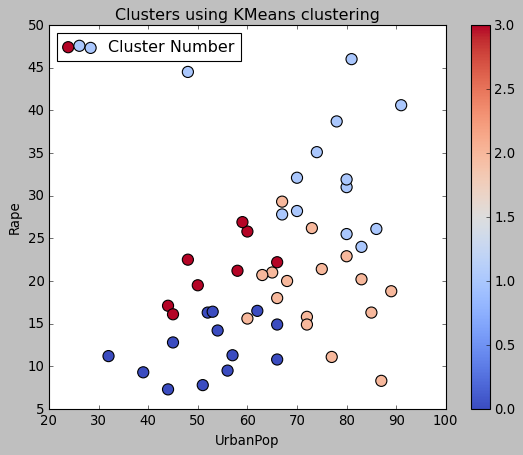

In [46]:
plt.style.use(['classic']) 
plt.figure(figsize=(8,4))
crime.plot(x="UrbanPop",y ="Rape",c=k_cluster.labels_,label = 'Cluster Number',kind="scatter",s=100 ,cmap=plt.cm.coolwarm) 
plt.title('Clusters using KMeans clustering')
plt.show()

<Figure size 640x320 with 0 Axes>

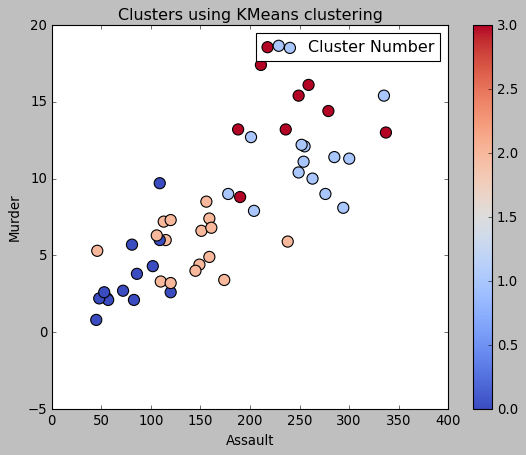

In [47]:
plt.style.use(['classic']) 
plt.figure(figsize=(8,4))
crime.plot(x="Assault",y ="Murder",c=k_cluster.labels_,label = 'Cluster Number',kind="scatter",s=100 ,cmap=plt.cm.coolwarm) 
plt.title('Clusters using KMeans clustering')
plt.show()

We can see that some of the observations of one cluster are overlapping with the other cluster. So let us check the accuracy of the model in classifying data by evaluating Silhouette score.

Evaluating accuracy of the model using Silhouette score

In [48]:
# Silhouette score ranges from -1 to 1. '-1' indicates model is not good. '1' indicates model is best. 
# '0' indicates clusters are overlapping
slht_scr_kc = sklearn.metrics.silhouette_score(crime_data_std, k_cluster.labels_) 
slht_scr_kc

0.33968891433344395

The score is closer to '0'. It indicates that the model is not that accurate at classifying the data, as clusters are overlapping. So try other methods of clustering.

### DB Scan Clustering model

Determining epsilon value

In [49]:
# Nearest neighbours = 2x(no. of Dimensions/columns)
nn = NearestNeighbors(n_neighbors=8)
nn = nn.fit(crime_data_std)
distances, indices = nn.kneighbors(crime_data_std)  

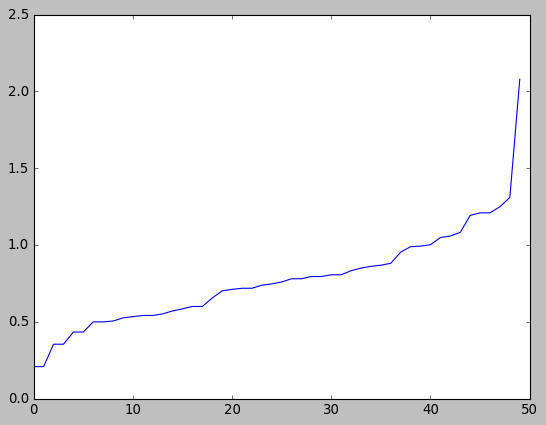

In [50]:
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances) 

The curve took a sharp bend at a value of 1.25. Hence the epsilon value is 1.25

#### Building the DB Scan clustering model

In [51]:
# min_samples=(no. of Dimensions/columns)+1
d_cluster = DBSCAN(eps=1.25, min_samples=5)
d_cluster.fit(crime_data_std)     

DBSCAN(eps=1.25)

In [52]:
d_cluster.labels_ 

array([ 0, -1,  1,  2, -1,  1,  2,  2, -1,  0,  2,  2,  1,  2,  2,  2,  2,
        0,  2,  1,  2,  1,  2, -1,  2,  2,  2, -1,  2,  2,  1,  1, -1,  2,
        2,  2,  2,  2,  2,  0,  2,  0,  2,  2,  2,  2,  2,  2,  2,  2],
      dtype=int64)

In [53]:
ds = pd.Series(d_cluster.labels_) 
crime['clust']=ds
crime

,States,Murder,Assault,UrbanPop,Rape,clust
0,Alabama,13.2,236,58,21.2,0
1,Alaska,10.0,263,48,44.5,-1
2,Arizona,8.1,294,80,31.0,1
3,Arkansas,8.8,190,50,19.5,2
4,California,9.0,276,91,40.6,-1
5,Colorado,7.9,204,78,38.7,1
6,Connecticut,3.3,110,77,11.1,2
7,Delaware,5.9,238,72,15.8,2
8,Florida,15.4,335,80,31.9,-1
9,Georgia,17.4,211,60,25.8,0


Analysing the results obtained from the model

In [54]:
crime.iloc[:,1:].groupby(crime.clust).mean()

,Murder,Assault,UrbanPop,Rape,clust
clust,,,,,
-1,12.616667,287.000,64.833333,32.700000,-1.0
0,14.720000,232.600,58.200000,23.720000,0.0
1,10.328571,263.000,76.857143,30.685714,1.0
2,5.243750,119.125,64.343750,16.625000,2.0


Following are the Different states in each cluster

In [55]:
d_cluster_neg1 = crime[(crime.clust==-1)]
d_cluster_neg1

,States,Murder,Assault,UrbanPop,Rape,clust
1,Alaska,10.0,263,48,44.5,-1
4,California,9.0,276,91,40.6,-1
8,Florida,15.4,335,80,31.9,-1
23,Mississippi,16.1,259,44,17.1,-1
27,Nevada,12.2,252,81,46.0,-1
32,North Carolina,13.0,337,45,16.1,-1


In [56]:
d_cluster_1 = crime[(crime.clust==1)]
d_cluster_1   

,States,Murder,Assault,UrbanPop,Rape,clust
2,Arizona,8.1,294,80,31.0,1
5,Colorado,7.9,204,78,38.7,1
12,Illinois,10.4,249,83,24.0,1
19,Maryland,11.3,300,67,27.8,1
21,Michigan,12.1,255,74,35.1,1
30,New Mexico,11.4,285,70,32.1,1
31,New York,11.1,254,86,26.1,1


In [58]:
d_cluster_2 = crime[(crime.clust==2)]
d_cluster_2  

,States,Murder,Assault,UrbanPop,Rape,clust
3,Arkansas,8.8,190,50,19.5,2
6,Connecticut,3.3,110,77,11.1,2
7,Delaware,5.9,238,72,15.8,2
10,Hawaii,5.3,46,83,20.2,2
11,Idaho,2.6,120,54,14.2,2
13,Indiana,7.2,113,65,21.0,2
14,Iowa,2.2,56,57,11.3,2
15,Kansas,6.0,115,66,18.0,2
16,Kentucky,9.7,109,52,16.3,2
18,Maine,2.1,83,51,7.8,2


<Figure size 640x320 with 0 Axes>

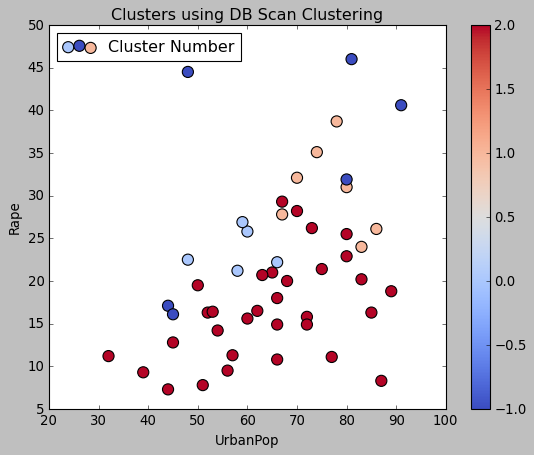

In [59]:
plt.style.use(['classic']) 
plt.figure(figsize=(8,4))
crime.plot(x="UrbanPop",y ="Rape",c=d_cluster.labels_,label = 'Cluster Number',kind="scatter",s=100 ,cmap=plt.cm.coolwarm) 
plt.title('Clusters using DB Scan Clustering')  
plt.show()

<Figure size 960x480 with 0 Axes>

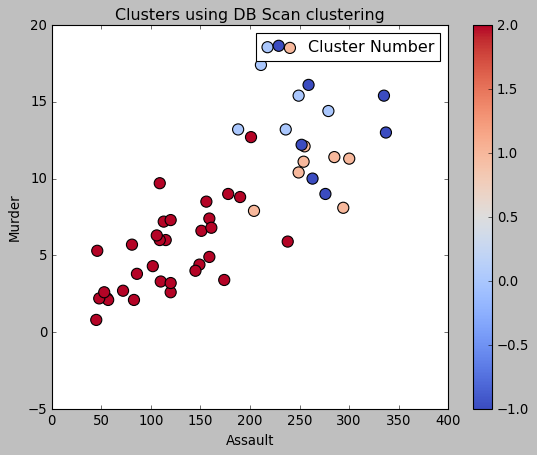

In [60]:
plt.style.use(['classic']) 
plt.figure(figsize=(12,6))
crime.plot(x="Assault",y ="Murder",c=d_cluster.labels_,label = 'Cluster Number',kind="scatter",s=100 ,cmap=plt.cm.coolwarm) 
plt.title('Clusters using DB Scan clustering') 
plt.show()

We can see that some of the observations of one cluster are overlapping with the other cluster. So let us check the accuracy of the model in classifying data by evaluating Silhouette score.

In [61]:
# Silhouette score ranges from -1 to 1. '-1' indicates model is not good. '1' indicates model is best. 
# '0' indicates clusters are overlapping
slht_scr_dc = sklearn.metrics.silhouette_score(crime_data_std, d_cluster.labels_) 
slht_scr_dc

0.23869670053300915

### Observation

The Silhouette score considering 4 number of clusters is closer to '0'. Hence DB Scan clustering model is not able to classify the dataset accurately. However it detected outliers.

#### Comparing all the models using Silhouette score

In [62]:
print("The Silhouette score of Hierarchical Clustering:",slht_scr_hc)
print("The Silhouette score of KMeans Clustering:",slht_scr_kc)
print("The Silhouette score of DB Scan Clustering:",slht_scr_dc)

The Silhouette score of Hierarchical Clustering: 0.3636819420151221
The Silhouette score of KMeans Clustering: 0.33968891433344395
The Silhouette score of DB Scan Clustering: 0.23869670053300915


Here we can see that the Silhouette score for Hierarchical clustering is more than other two models.

### Conclusion
Hence the Hierarchical clustering model can be selected to classify the dataset.

<Figure size 960x480 with 0 Axes>

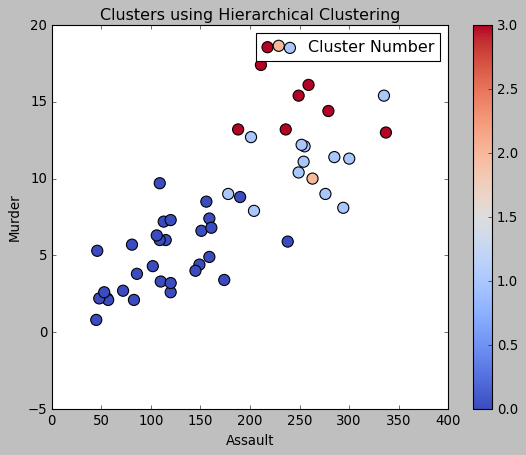

In [63]:
plt.style.use(['classic']) 
plt.figure(figsize=(12,6))
crime.plot(x="Assault",y ="Murder",c=cluster_labels,label = 'Cluster Number', kind="scatter",s=100 ,cmap=plt.cm.coolwarm) 
plt.title('Clusters using Hierarchical Clustering')
plt.show()